Data cleaning and preprocessing

In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Mount Google Drive and Load Dataset
from google.colab import drive
drive.mount('/content/drive')

# Use your actual path from Google Drive (Right-click > Copy path)
file_path = "/content/drive/MyDrive/ainternshipe/Titanic-Dataset.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
df.info()
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Step 3: Handle Missing Values

print("\nMissing Values Before:")
print(df.isnull().sum())

# Fill 'Age' with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to excessive missing data
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing Values After:")
print(df.isnull().sum())



Missing Values Before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-2565632617.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2565632617.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [6]:
# Step 4: Encode Categorical Variables

# Label Encode 'Sex' (male=1, female=0)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode 'Embarked' (drop_first to avoid dummy trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [7]:
# Step 5: Standardize Numerical Features

# Create a copy for normalization
df_norm = df.copy()

# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
df_norm[['Age', 'Fare']] = scaler.fit_transform(df_norm[['Age', 'Fare']])

# View normalized values
df_norm[['Age', 'Fare']].head()


,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


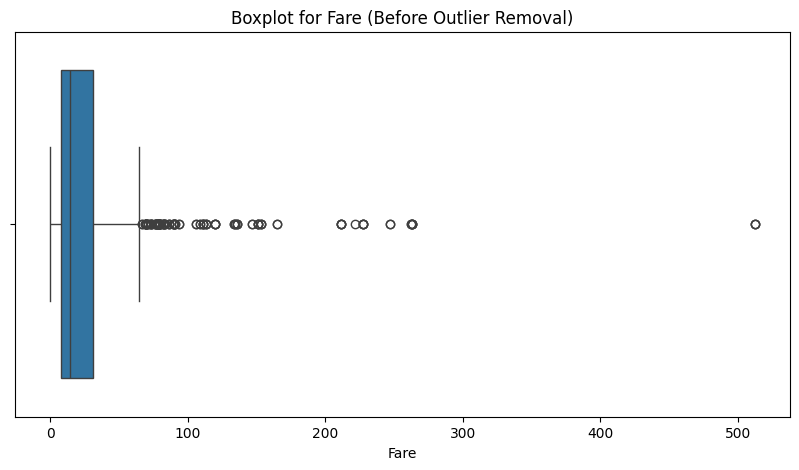

In [8]:
# Step 6: Outlier Detection

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot for Fare (Before Outlier Removal)")
plt.show()


In [9]:
# Step 7: Remove Outliers using IQR method

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (775, 12)


In [10]:
# Step 8: Save Cleaned Data (optional)
df.to_csv("cleaned_titanic.csv", index=False)
print("Cleaned dataset saved as 'cleaned_titanic.csv'")


Cleaned dataset saved as 'cleaned_titanic.csv'
